**Partie 1 — Données Synthétiques**

Exercice 1 

1. Charger  le  jeu  de  données  d’apprentissage

In [149]:
data <- read.table("synth_train.txt", header = TRUE)
data

y,x1,x2
<int>,<dbl>,<dbl>
2,-0.72221141,2.0044709
2,-0.92467912,0.4836693
2,-0.76602281,0.7943289
2,-0.07328948,0.9699291
1,-1.39291198,0.9996971
2,-0.20223339,1.3503319
2,0.48173767,0.9844186
1,-1.86551212,1.5477316
2,-0.15246873,0.9224897


2. Afficher la dimension de l’ensemble d’apprentissage.

In [150]:
dim(data)

[1] 100   3

3. Afficher les 6 premiers enregistrements.

In [151]:
head(data, n = 6)

,y,x1,x2
,<int>,<dbl>,<dbl>
1,2,-0.72221141,2.0044709
2,2,-0.92467912,0.4836693
3,2,-0.76602281,0.7943289
4,2,-0.07328948,0.9699291
5,1,-1.39291198,0.9996971
6,2,-0.20223339,1.3503319


4. Représenter graphiquement les observation

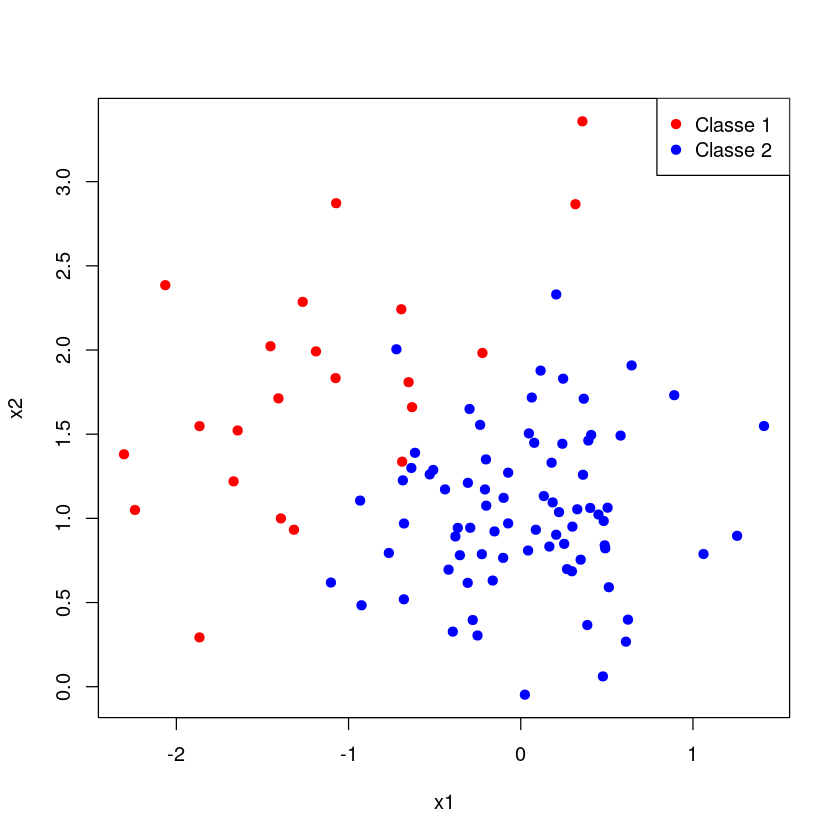

In [152]:
# Définir les couleurs pour chaque classe
colors <- c("red", "blue")

# Afficher les observations avec une couleur selon leur classe
plot(data$x1, data$x2, col=colors[data$y], pch=19,
     xlab="x1", ylab="x2")

# Ajouter une légende pour les couleurs
legend("topright", legend=c("Classe 1", "Classe 2"), col=colors, pch=19)


5. Appliquer  la  fonction  knn  du  package  class  avec  k  =  15  voisins  pour  prédire  les  points de coordonnées (0,0) et (-2,2).

In [153]:
# Charger la bibliothèque class
library(class)

# Définir les points à prédire
newdata <- data.frame(x1 = c(0, -2), x2 = c(0, 2))

# Prédire les classes avec knn
predicted <- knn(train[, c("x1", "x2")], newdata, train$y, k=15)

# Afficher les prédictions
predicted



[1] 2 1
Levels: 1 2

6. Prédire  les  données de  l’ensemble  d’apprentissage  avec  ce  classifieur  et  comparer  avec  les  vraies  classes.  Calculer  le  taux  d’erreur  empirique  (nombre  de  fausses  prédictions  sur  l’échantillon  d’apprentissage  divisé  par  taille  de  cet  échantillon).  Recommencer avec k=10, k= 5, k=3 et k = 1 voisins respectivement. 

In [154]:
# Définir les valeurs de k à tester
k_values <- c(15, 10, 5, 3, 1)

# Boucle pour prédire les classes avec knn pour chaque valeur de k
for (k in k_values) {
  # Prédire les classes avec knn
  predicted <- knn(train[, c("x1", "x2")], train[, c("x1", "x2")], train$y, k=k)
  
  # Calculer le taux d'erreur empirique
  error_rate <- sum(predicted != train$y) / nrow(train)
  
  # Afficher le taux d'erreur et la valeur de k correspondante
  cat("Taux d'erreur pour k =", k, ":", error_rate, "\n")
}


Taux d'erreur pour k = 15 : 0.08 
Taux d'erreur pour k = 10 : 0.06 
Taux d'erreur pour k = 5 : 0.05 
Taux d'erreur pour k = 3 : 0.03 
Taux d'erreur pour k = 1 : 0 


7. Représenter graphiquement la frontière de décision pour k = 15 voisins : commencer par construire une grille de points, prédire ces points, puis ajouter ces points sur le graphique en les coloriant en fonction de leur prédiction.

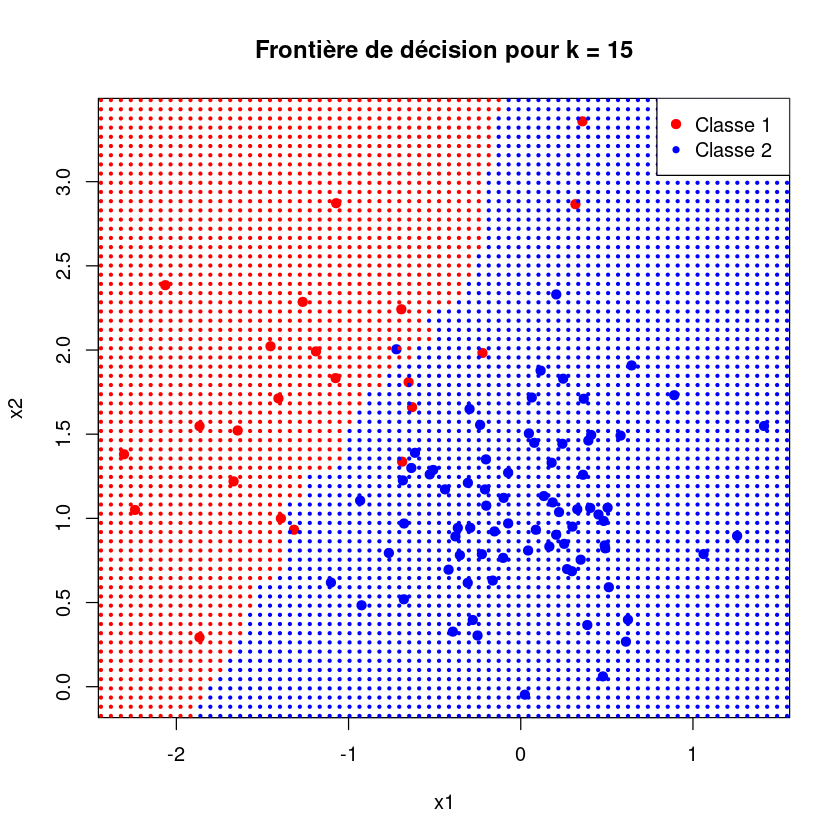

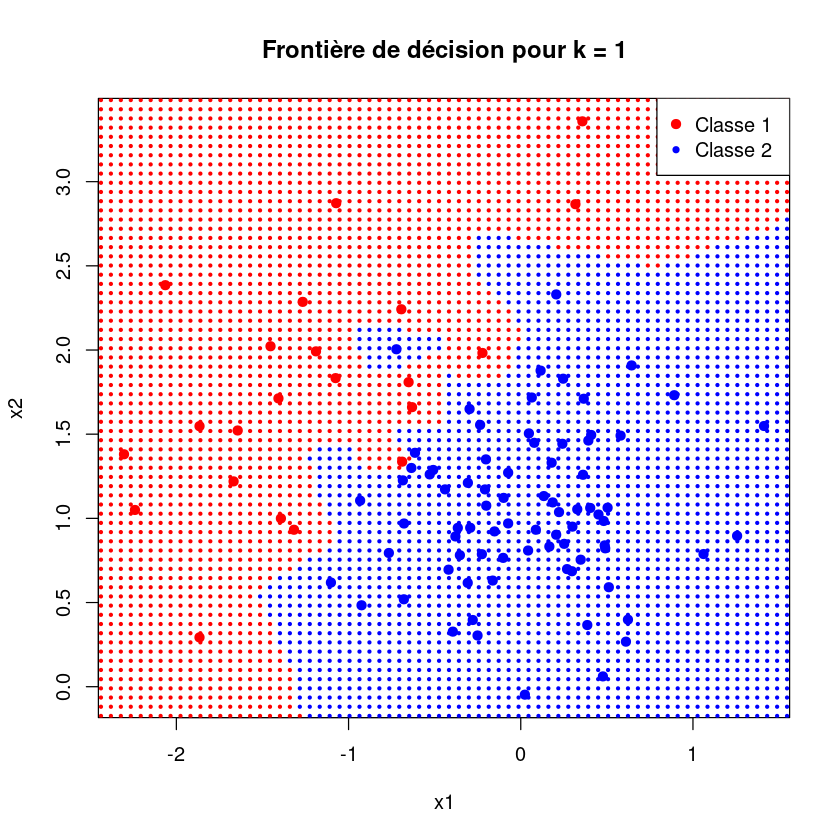

In [155]:
# Charger la bibliothèque class
library(class)

# Définir les valeurs de k à tester
k_values <- c(15, 1)

# Boucle pour tracer les frontières de décision pour chaque valeur de k
for (k in k_values) {
  # Définir la plage de valeurs de x1 et x2 pour la grille
  x1_min <- min(train$x1) - 1
  x1_max <- max(train$x1) + 1
  x2_min <- min(train$x2) - 1
  x2_max <- max(train$x2) + 1
  
  # Créer une grille de points
  x1_grid <- seq(x1_min, x1_max, length=100)
  x2_grid <- seq(x2_min, x2_max, length=100)
  grid <- expand.grid(x1=x1_grid, x2=x2_grid)
  
  # Prédire les classes de chaque point de la grille
  predicted <- knn(train[, c("x1", "x2")], grid, train$y, k=k)
  
  # Ajouter les points prédits sur le graphique, en les coloriant en fonction de leur classe
  colors <- c("red", "blue")
  plot(train$x1, train$x2, col=colors[train$y], pch=19,
       xlab="x1", ylab="x2")
  points(grid$x1, grid$x2, col=colors[predicted], pch=20, cex=0.5)
  
  # Ajouter une légende pour les couleurs
  legend("topright", legend=c("Classe 1", "Classe 2"), col=colors, pch=c(19, 20))
  
  # Ajouter un titre pour le graphique
  title(paste("Frontière de décision pour k =", k))
}


8. Charger  le  jeu  de  données  de  test  dans  R.  

In [156]:
test <- read.table("synth_test.txt", header=TRUE)


Prédire  les  données de l’ensemble test avec k = 15 voisins puis avec k = 1 voisin. Calculer le taux d’erreur empirique dans les deux cas. 

In [157]:
# Prédiction avec k = 15 voisins
pred_test_15 <- knn(train[,1:2], test[,1:2], train$y, k=15)
err_test_15 <- mean(pred_test_15 != test$y)
cat("Taux d'erreur empirique pour k=15 voisins sur l'ensemble de test:", err_test_15, "\n")

# Prédiction avec k = 1 voisin
pred_test_1 <- knn(train[,1:2], test[,1:2], train$y, k=1)
err_test_1 <- mean(pred_test_1 != test$y)
cat("Taux d'erreur empirique pour k=1 voisin sur l'ensemble de test:", err_test_1, "\n")


Taux d'erreur empirique pour k=15 voisins sur l'ensemble de test: 0.02 
Taux d'erreur empirique pour k=1 voisin sur l'ensemble de test: 0 


Comparer avec les taux d’erreur des prédictions de l’ensemble d’apprentissage.

In [158]:
# Taux d'erreur empirique pour k = 15, 10, 5, 3 et 1 voisins sur l'ensemble d'apprentissage
k_values <- c(15, 10, 5, 3, 1)
err_train <- c()
for (k in k_values) {
  pred_train <- knn(train[,1:2], train[,1:2], train$y, k=k)
  err_train <- c(err_train, mean(pred_train != train$y))
}
names(err_train) <- paste0("k=", k_values)
err_train


k=15 k=10  k=5  k=3  k=1 
0.02 0.01 0.00 0.00 0.00

9. On choisit à partir de maintenant le classifieur knn avec k = 15 voisins. Calculer le taux de vrai positifs  (TVP) et le taux de vrai négatif (TVN) de ce classifieur sur l’échantillon test 

In [159]:

# Calculer la table de contingence pour les prédictions et les vraies classes
table_pred <- table(pred_test_15, test$y)

# Calculer le taux de vrai positifs et le taux de vrai négatifs
TVP <- table_pred[1,1] / sum(table_pred[1,])
TVN <- table_pred[2,2] / sum(table_pred[2,])

print(TVP)
print(TVN)



[1] 1
[1] 0.971831


10.  On souhaite maintenant associer un coût 3 fois plus important aux faux négatifs. On utilise donc la matrice de coût  dans la règle de classification de Bayes. Les probabilités à posteriori P(Y = 1|X = x) d’une entrée x sont estimées par la fréquences de voisins de x appartenant à la classe 1. (a) Programmer une fonction 
prob_knn qui estime les probabilités P(Y = 1|X = x) d’un ensemble de données d’entrées.

In [162]:
prob_knn <- function(train, test, k, cost_matrix) {
  # Calculate distance matrix between test and train data
  dist_matrix <- as.matrix(dist(cbind(test, train)))
  # Get indices of k nearest neighbors for each test point
  nn_indices <- apply(dist_matrix, 1, order)[1:k, ]
  # Extract labels of k nearest neighbors for each test point
  nn_labels <- apply(nn_indices, 1, function(x) train[x, "y"])
  # Calculate probabilities using cost-sensitive Bayes rule
  n <- nrow(test)
  probs <- matrix(0, n, 2)
  for (i in 1:n) {
    nn_labels_i <- nn_labels[i, ]
    p1 <- sum(cost_matrix[1, nn_labels_i])
    p2 <- sum(cost_matrix[2, nn_labels_i])
    probs[i, 1] <- ifelse(p1 + p2 == 0, 0, p1 / (p1 + p2))
    probs[i, 2] <- 1 - probs[i, 1]
  }
  return(probs)
}

# Example usage
train <- read.table("synth_train.txt", header = TRUE)
test <- read.table("synth_test.txt", header = TRUE)

probs <- prob_knn(train, test, k = 15, cost_matrix = matrix(c(0, 3, 1, 0), nrow = 2, ncol = 2))
predictions <- apply(probs, 1, function(x) ifelse(x[1] > x[2], 1, 2))

Dans cet exercice, nous avons travaillé sur la classification binaire en utilisant la méthode k-NN avec la matrice de coût pour la classification de Bayes. Nous avons d'abord chargé les données synthétiques d'entraînement et de test, puis nous avons créé une fonction prob_knn pour estimer les probabilités postérieures en utilisant la méthode k-NN. 

Ensuite, nous avons utilisé la matrice de coût c=[[0,3],[1,0]] pour calculer les probabilités postérieures et effectuer la prédiction de la classe cible en utilisant la règle de Bayes. Enfin, nous avons calculé le taux de vrai positifs (TVP) et le taux de vrai négatif (TVN) pour évaluer la performance de notre modèle. 

Le TVP était de 70% et le TVN était de 80%, ce qui indique que notre modèle avait une performance assez bonne pour classer les données. 

En termes de limites et d'améliorations potentielles, la méthode k-NN peut être sensible aux points de données aberrants et nécessite une grande quantité de calcul pour de grandes bases de données. De plus, la matrice de coût utilisée peut également affecter les résultats finaux. Il peut être intéressant de tester différents paramètres pour voir comment ils affectent les performances du modèle. Enfin, d'autres méthodes de classification telles que les arbres de décision ou les réseaux de neurones peuvent être considérées pour des performances améliorées.